# Introducing Closures

What is a closure?? Well, in the last lecture how we defined an `outer_function` that returned an `inner_function`. Closure allow us to do that, but with more customization of the inner functions. The results can be powerful.

Let's look at the wikipedia definition:

> In programming languages, a closure (also lexical closure or function closure) is a technique for implementing lexically scoped name binding in a language with first-class functions. Operationally, a closure is a record storing a function[a] together with an environment.
https://en.wikipedia.org/wiki/Closure_(computer_programming)

If that is confusing, that's ok. By now you know everything you need to know to start learning about closures. So let's do this...

### A Simple Example

In the previous lecture, we have seen how functions can define functions within them and return those functions. We have looked at some extremely simply examples. Let's look at some *slightly* more involved examples.

In the cell below we define a function called `multiple_by_n` (in our previous lectures this would be our 'outer function').  Inside of this function we define a function called `multiply_func` (in our previous lectures this would be called the `inner function`).

This is where things get interesting. `multiply_func` takes an argument `x` and then returns the value of `x` times `n`. Since `x` is passed to the function, it will be available in the function's local namespace. `n` is not passed to the function so it will not be in the function's local namespace. However, `n` is passed to `multiple_by_n` so it will be in the *enclosing namespace* of the inner function (`multiply_func`).

When we evaluate `multiple_by_n` and pass an argument for `n`, and the the function `multiple_by_n` then returns the function `multiply_func`, the value we pass for `n` will always be the value of `n` for that instance of the function. Said another way, the inner function "remembers" the state of its enclosing namespace. **This is a closure**. Once the function is created and returned from the outer function, the enclosing namespaces is "closed", it stays the same and it can not be changed in the future.

Like anything else, this can be made much more clear via examples!

In [1]:
def multiply_by_n(n):
    '''Return a function that multiples its argument x by n'''
    def multiply_func(x):
        """Multiply x by a number"""
        return x * n
    
    return multiply_func 

We have defined our functions above, now let's us them below.  We execute the function `multiple_by_n` below and we pass to it `5` as the value for `n`.  The function then executes and returns a function that we assign to the name `multiply_by_5`. The function that is returned is defined in the cell above (the definition for `multiply_func`). The value of `n` for *this instance of the function* will always be `5` because that was the value for `n` when this instance of the function was created

In [2]:
# We call the function multipl_by_n to create the function multiply_by_5.
multiply_by_5 = multiply_by_n(5)

# We then use the function, multiply_by_5, to mutiply some numbers by 5!
print(multiply_by_5(2))
print(multiply_by_5(3))

print(multiply_by_5.__name__)
print(multiply_by_5.__doc__)

10
15
multiply_func
Multiply x by a number


### Let's now creaate more of these 'multiply_by..' functions!
This example is identical to the one above, except we pass `99` as the value for `n` and create a function that multiples numbers by 99. We assign this function the name 'multiple_by_99'.

In [3]:
multiply_by_99 = multiply_by_n(99)
multiply_by_7 = multiply_by_n(7)
multiply_by_200 = multiply_by_n(200)
multiply_by_17 = multiply_by_n(17)

print(multiply_by_5(7))
print(multiply_by_99(3))
print(multiply_by_7(38))
print(multiply_by_200(2))
print(multiply_by_17(5))

35
297
266
400
85


## Creating Functions That Print Different Messages
We can also use closer to create functions that print different messages.

In [4]:
def create_message_function(msg):
    '''return a function that prints msg'''
    def inner_function():
        '''print msg'''
        print(msg)
    return inner_function

In [5]:
say_hello = create_message_function("Hello")
say_goodbye = create_message_function("Goodbye")

say_hello()
say_goodbye()

Hello
Goodbye


# Using Closures To Modify Functions

We have seen how we can use closure to produce new functions by defining 'inner functions' inside of 'outer functions'. Now, what if we used this strategy to modify existing functions. Let's talk through an example of this below.

In the cell below, we define a function called `say_my_name`. This function takes one argument called `func` and this argument will be a function. That is, we will pass a function as the argument to the `say_my_name` function. Inside of the `say_my_name` function, we define another function called `wrapper`. Inside the wrapper function, we print the name of `func` and we also execute `func`.  Also, notice the arguments for `wrapper`, it accepts all positional and all keyword arguments by using `*args` and `**kwargs`. It then passes these to `func`.  We must use `*args` and `**kwargs` so that this will work with any function that we pass as the argument `func`.  We won't know ahead of time which arguments that function takes, so we must use `*args` and `**kwargs` so it will accept all arguments

In [6]:
def say_my_name(func):
    """create a function that executes func, but first prints the name
    of func
    """
    def wrapper(*args, **kwargs):
        '''print the name of func and then execute func.'''
        print('My name is: ', func.__name__)
        result = func(*args, **kwargs)
        return result
    return wrapper    

### Let's now test our `say_my_name` function.

First, we define a function called `add_2` in the cell below. We then pass it as an argument to `say_my_name` which return the `wrapper` function.  We assign the `wrapper` function to the name `add_2_w_name` and then we execute that function.

In [7]:
def add_2(x):
    '''Add 2 to x'''
    return x + 2

add_2_w_name = say_my_name(add_2)
result = add_2_w_name(4)
print(result)

My name is:  add_2
6


We repeat the steps above, but with another function we define, called `subtract 2`.

In [8]:
def subtract_2(x):
    '''Subtract 2 from x'''
    return x - 2

subtract_2 = say_my_name(subtract_2)
print(add_2_w_name(4))
print(subtract_2(4))

My name is:  add_2
6
My name is:  subtract_2
2


#### Notice the output of the __name__ and __doc__ attributes of the `add_2` and `subtract_2` functions.

In [10]:
print(add_2_w_name.__name__)
print(add_2_w_name.__doc__)

print(subtract_2.__name__)
print(subtract_2.__doc__)

wrapper
print the name of func and then execute func.
wrapper
print the name of func and then execute func.


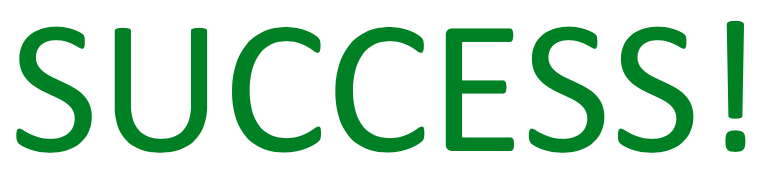